In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


In [2]:
diabetesDF = pd.read_csv('/content/diabetes.csv')
diabetesDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
df = diabetesDF.copy()

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

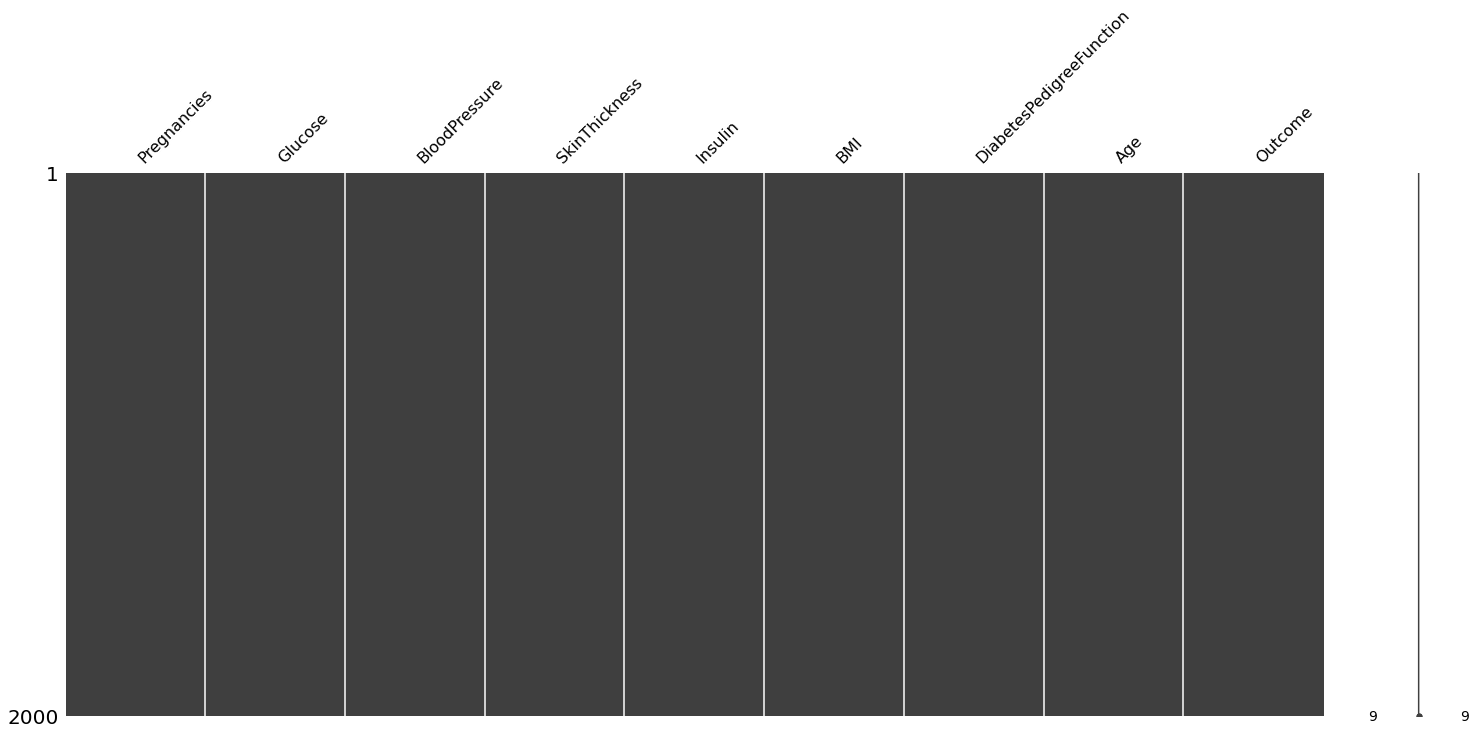

In [23]:
import missingno as msno
msno.matrix(df)

In [15]:
print("Rows and columns = ", df.shape)
print("No. of dimension = ", df.ndim)

Rows and columns =  (2000, 9)
No. of dimension =  2


In [22]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [5]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


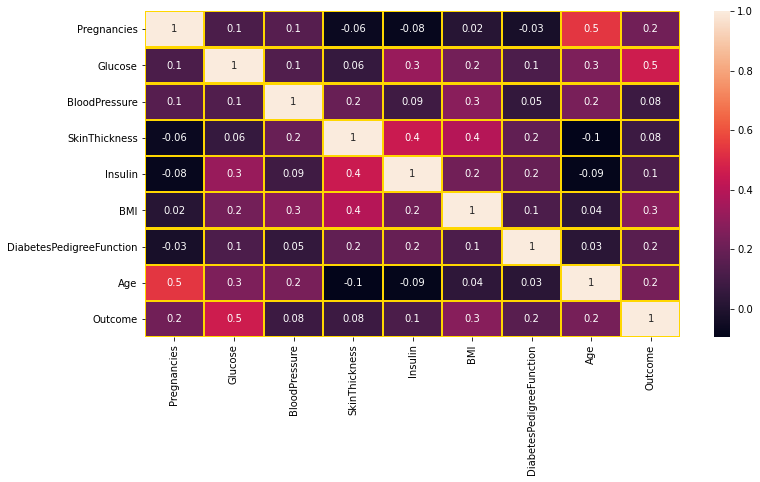

In [10]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), robust=True, fmt='.1g', linewidths=1.3, linecolor='gold', annot=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


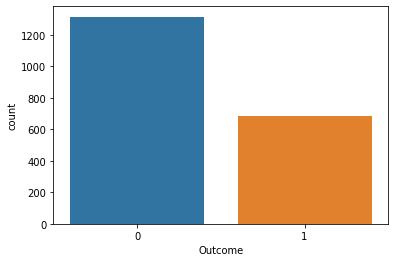

In [16]:
sns.countplot(df.Outcome)

In [19]:
print("No. of patients with diabities = ", df[df['Outcome']==1].shape[0])
print("No. of patients without diabities = ", df[df['Outcome']==0].shape[0])

No. of patients with diabities =  684
No. of patients without diabities =  1316


In [21]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


In [24]:
# Model Building

x = df.drop(['Outcome'], axis=1) #independent value
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [27]:
y = df.Outcome #dependent value
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [28]:
#Normalizing the data
means = np.mean(x, axis=0)
stds = np.std(x, axis=0)

X = (x - means)/stds
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524553,-0.372481,0.873645,-0.722016,0.172683,-1.063246,1.180424
1,-1.120495,-1.159756,0.670080,0.625186,0.402563,0.737249,-0.735551,-0.856326
2,-1.120495,0.742890,-3.604422,-1.300374,-0.722016,1.473638,0.491759,-0.177409
3,-1.120495,0.430980,-0.059713,1.308449,1.527142,1.240448,-0.327478,-0.771462
4,-0.817945,0.555744,-0.372481,1.246334,3.596367,1.044077,0.201161,-1.026055
...,...,...,...,...,...,...,...,...
1995,-0.515394,-1.440474,-0.268225,0.190382,-0.227201,-0.305970,-0.312021,-0.007680
1996,1.299907,1.803381,0.148800,1.308449,0.447546,0.062225,0.766899,0.246914
1997,0.694807,-1.128565,0.461568,-1.300374,-0.722016,-0.121872,-0.274924,0.756101
1998,-1.120495,0.243835,2.129667,1.556908,0.447546,4.284191,-0.469686,-0.601732


In [140]:
#Test Train Split
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365)

MODEL Comparision



In [141]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
log_reg.intercept_
log_reg.coef_

array([[ 0.446022  ,  1.05162714, -0.17702875, -0.03270499, -0.07551321,
         0.65636194,  0.28583764,  0.1496717 ]])

In [143]:
coef = list(log_reg.coef_[0])
coef

[0.44602200204040443,
 1.0516271413393867,
 -0.17702875388896216,
 -0.03270499257081493,
 -0.07551321077762946,
 0.6563619357224417,
 0.28583764340417833,
 0.14967169950086948]

In [144]:
labels = list(x.columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Text(0.5, 0, 'Importance')

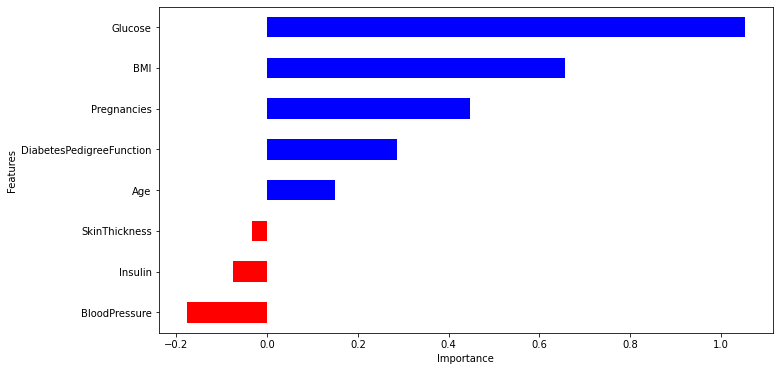

In [145]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coef
features.sort_values(by = ['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11,6), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [146]:
y_pred = log_reg.predict(X_test)
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

Prabability Values

In [147]:
y_probs = log_reg.predict_proba(X_test)
#y_probs

In [149]:
print('Probability:', y_probs[:1])
print('Prediction:', y_pred[:1])

Probability: [[0.62466566 0.37533434]]
Prediction: [0]


In [150]:
from sklearn.metrics import accuracy_score
log_score = accuracy_score(y_test, y_pred)
print("Model accouracy = ", log_score * 100)

Model accouracy =  78.5


In [151]:
print('accuracy score of the model is',log_reg.score(X_test, y_test) * 100)

accuracy score of the model is 78.5


In [152]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_pred)

array([[231,  21],
       [ 65,  83]])

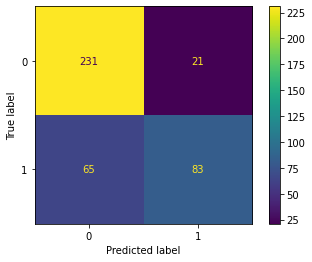

In [153]:
plot_confusion_matrix(log_reg, X_test, y_test, values_format='.5g')

Random forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
r_for = RandomForestClassifier().fit(X_train, y_train)
r_for

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [159]:
y_pred = r_for.predict(X_test)
y_pred[:20]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [160]:
rf_score = accuracy_score(y_test, y_pred)
rf_score

0.9775

Text(0.5, 0, 'Variables Significance Level')

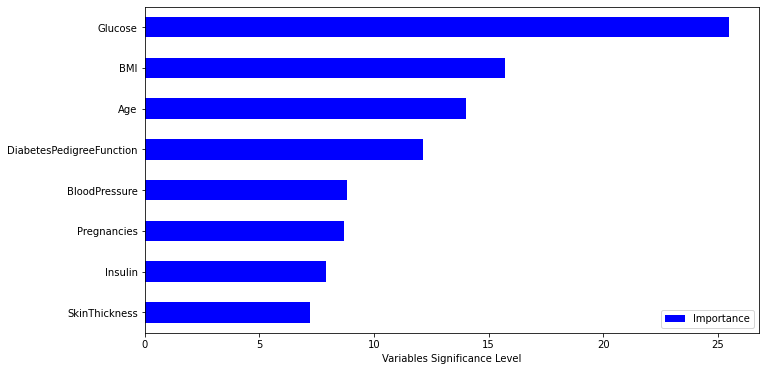

In [165]:
Importance = pd.DataFrame({"Importance" : r_for.feature_importances_*100}, index = X_train.columns)
Importance.sort_values(by = "Importance", axis=0, ascending=True, inplace=True)
Importance.plot(kind='barh', figsize=(11,6), color = "b")
plt.xlabel('Variables Significance Level')

KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [169]:
y_pred = knn.predict(X_test)
y_pred[:20]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [170]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.8925

In [171]:
confusion_matrix(y_test,y_pred)

array([[238,  14],
       [ 29, 119]])

Support Vector Machine (SVM)

In [172]:
from sklearn.svm import SVC

In [173]:
svm_model = SVC(C=5,degree=9,kernel = 'poly').fit(X_train,y_train)
svm_model

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [174]:
y_pred = svm_model.predict(X_test)
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [175]:
svm_score = accuracy_score(y_test,y_pred)
svm_score

0.8225

In [176]:
confusion_matrix(y_test,y_pred)

array([[250,   2],
       [ 69,  79]])

Model Comparision

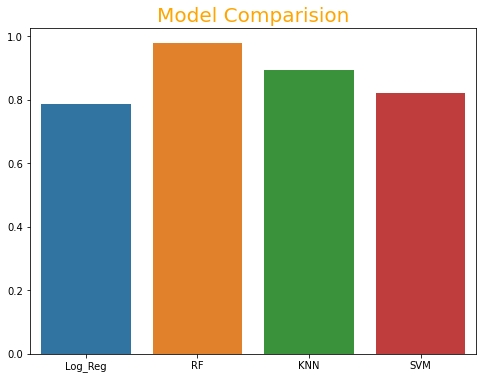

In [178]:
indexx = ["Log_Reg","RF","KNN","SVM"]
regressions = [log_score,rf_score,knn_score,svm_score]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);